In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


# Load the dataset

In [3]:
data = pd.read_csv("real-estate.csv", encoding="latin-1")

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Data Pre-Processing

In [4]:
x = data[['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']

# Splitting the data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Predicting the data

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([47.88625422, 41.16404556, 44.27301439, 40.19761542, 27.51326511,
       45.10953115, 44.63293274, 46.36346234, 23.62063133, 54.33444894,
       34.07416461, 36.54533193, 37.55154254, 23.2794052 , 35.26614165,
       34.38327747, 43.35633504, 45.40740539, 30.07083159, 44.09191493,
        0.73505984, 34.99271686, 48.22735154, 45.48646485, 11.5995282 ,
       39.69783664, 12.71276251, 42.91282893, 34.93451401, 37.27964515,
       13.17842185, 40.12708486, 35.21883505, 27.71588924, 46.40090931,
       31.21941994, 50.90046891, 14.07339433, 49.05344276, 40.0538446 ,
       38.24588962, 40.63256441, 47.01634759, 37.65598977, 39.85801839,
       46.88588156, 43.7241343 , 20.94434531, 47.41546271, 45.40608841,
       48.33783579, 48.98845389, 42.27403852, 42.5841908 , 36.04088185,
       14.95491907, 36.61494629, 34.88196676, 28.33519081, 45.91188076,
       33.19268817, 32.18910095, 14.95491907,  8.86547927, 10.36079881,
       34.11119212, 28.48186875, 46.59826043, 32.96743316, 31.47

# Accuracy of the data

In [7]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-Squared: {r2*100:.2f}'+'%')


Mean Squared Error: 53.51
Root Mean Squared Error: 7.31
R-Squared: 68.11%


c:\Users\adhen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Plotting the data

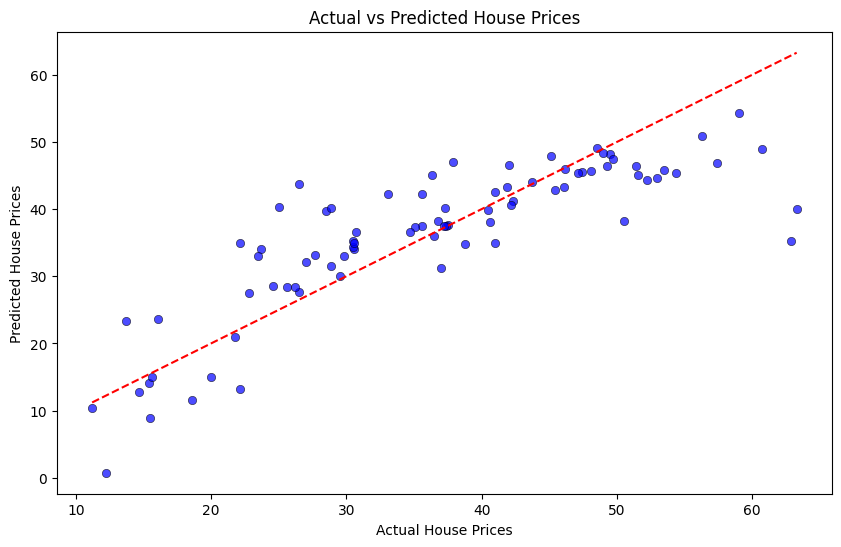

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='b', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()